###### В задачах машинного обучения в датасетах, как правило, мы имеем множество признаков с которыми мы работаем на протяжении всего цикла проекта и которые нам нужно обработать на первых этапах работы с данными. Чтобы привести данные в более или менее пригодный вид мы будем использовать различные методы обработки и предобработки данных - Data Cleaning & Data Preprocessing.

###### Зачастую, если не всегда, реальные данные содержат шумы, пропущенные значения и, возможно, непригодный формат представления. Такие данные никак нельзя использовать для целей машинного и глубокого обучения. Предварительная обработка данных необходима для очистки данных и подготовки их к модели машинного обучения, что также повышает точность и эффективность модели машинного обучения.

------
### Всегда помните про принцип:
<center> Garbage in  = Garbage out.</center>
<br>

------


###### Всегда, прежде чем перейти к этапу моделирования и тренировки модели машинного обучения, максимально разберитесь с чистотой и корректностью ваших данных, иначе последующие этапы работы просто будут вашим потраченным временем. Как правило, около 60% времени на реальных проектах вы будете тратить на добычу и обработку ваших данных, писать фукнции, классы, запросы и складывать их в пайплайн для целей Data Cleaning & Data Preprocessing.


**Этап обработки данных включает в себя следующее:**
1. Получение данных.
2. Базовое знакомство с датасетом.
3. Анализ пропущенных и невалидных значений в датасете.
4. Анализ распределений признаков.
5. Корреляционный анализ.
6. Энкодинг категориальных данных для целей обучения модели машинного обучения.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv("./datasets/Loan_Default.csv", index_col=False)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [39]:
df.Gender.value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

#### 2. Выявление некорректных и пропущенных значений:


Пропущенные данные не редкость в реальных наборах данных и в записях баз данных. Вероятность того, что хотя бы одно наблюдение отсутствует либо некорректно, увеличивается по мере увеличения размера вашего набора данных. Пропущенные и некорректные данные могут возникать в виду различных причин и событий.

<br>

Визуализация первый лучший метод понять все ли в порядке с вашим датасетом и с вашими данными. Это первый шаг к пониманию проблемы с вашим датасетом. **Для небольших и средних данных (сотни тысяч наблюдений и до сотни признаков)** доступно несколько полезных методов, которые позволяют визуализировать все выборки и атрибуты разом:

- Матрицы отношений
- Корреляционная карта признаков
- Дендограмма
- Простой числовой вывод статистик и распределений


**Матрица пропущенных значений в разрезе признаков:**

<br>

Это матрица, которая позволяет нам увидеть **распределение данных по всем признакам (столбцам) во всем наборе данных. Этот вид графика также показывает спарклайн (или, в некоторых случаях, полосатую линию), которая выделяет строки в наборе данных с самой высокой и самой низкой плотностью пропущенных значений. Для того чтобы иметь возможность построить такую матрицу вам надо установить пакет ```missingno``` используя ваш менеджер пакетов Python.

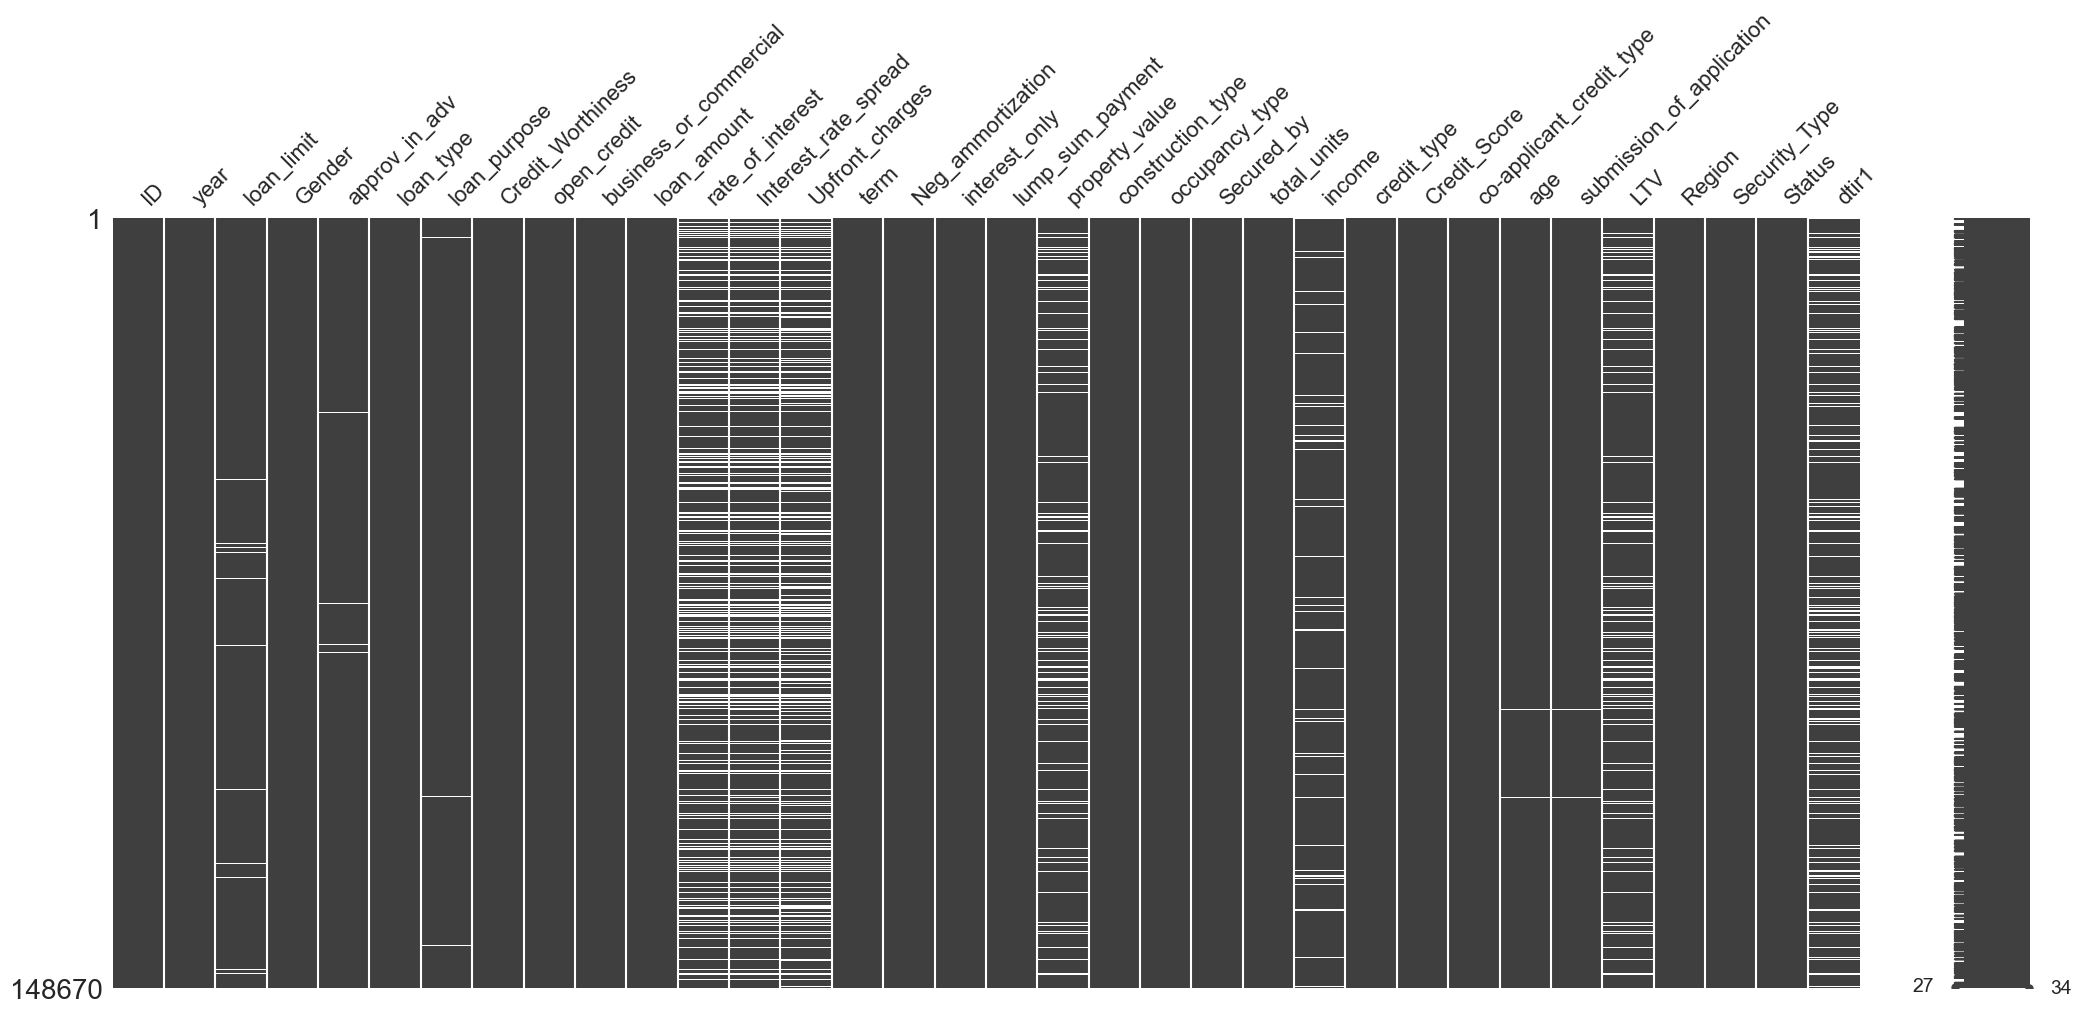

<Figure size 1500x900 with 0 Axes>

In [41]:
import missingno as msno

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

По результатам данной матрицы мы видим, что большая часть признаков имеет огромное количество пропущенных значений.

**Тепловая карта корреляций признакового пространства:**

<br>

Тепловая карта корреляций признакового пространства измеряет корреляцию между столбцами в наборе данных. Она показывает, насколько сильно наличие или отсутствие одного признака влияет на другой. Или в целом насколько признаки связаны друг с другом. Как правило признаки имеющие сильную взаимосвязь являются дублирующими признаками и от одного из них можно спокойно избавиться, от какого из двух, вам помогут методы факторного анализа.



<Axes: >

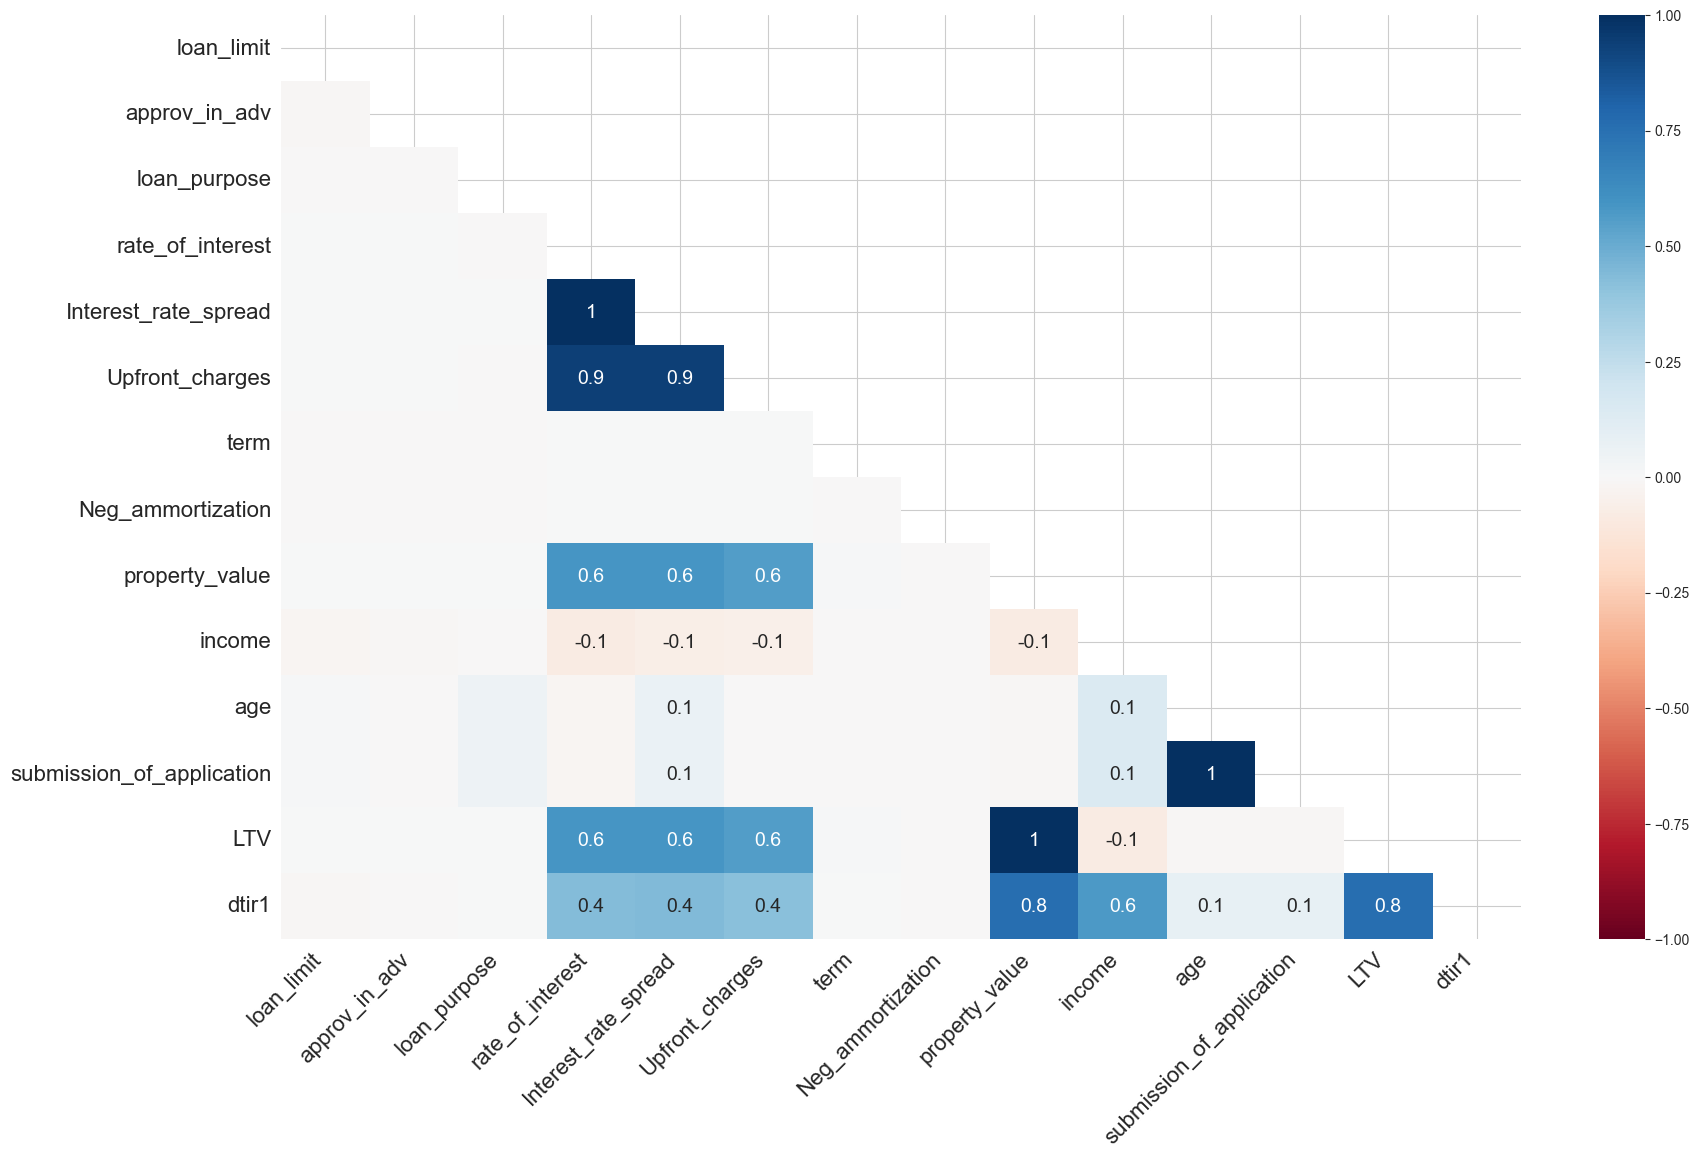

In [42]:
msno.heatmap(df, labels = True)

С такой тепловой карты мы легко можем понять, что отсутствие признака rate_of_interest и upfront_charges взаимосвязано (метрика равна 1) и если присутствует значение в одном признаке то оно будет присутствовать и в другом признаке.

**Дендограммы:**

<br>

Дендрограмма показывает иерархическую взаимосвязь между столбцами. Дендрограмма использует алгоритм иерархической кластеризации метрике корреляции.

In [43]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<Axes: >

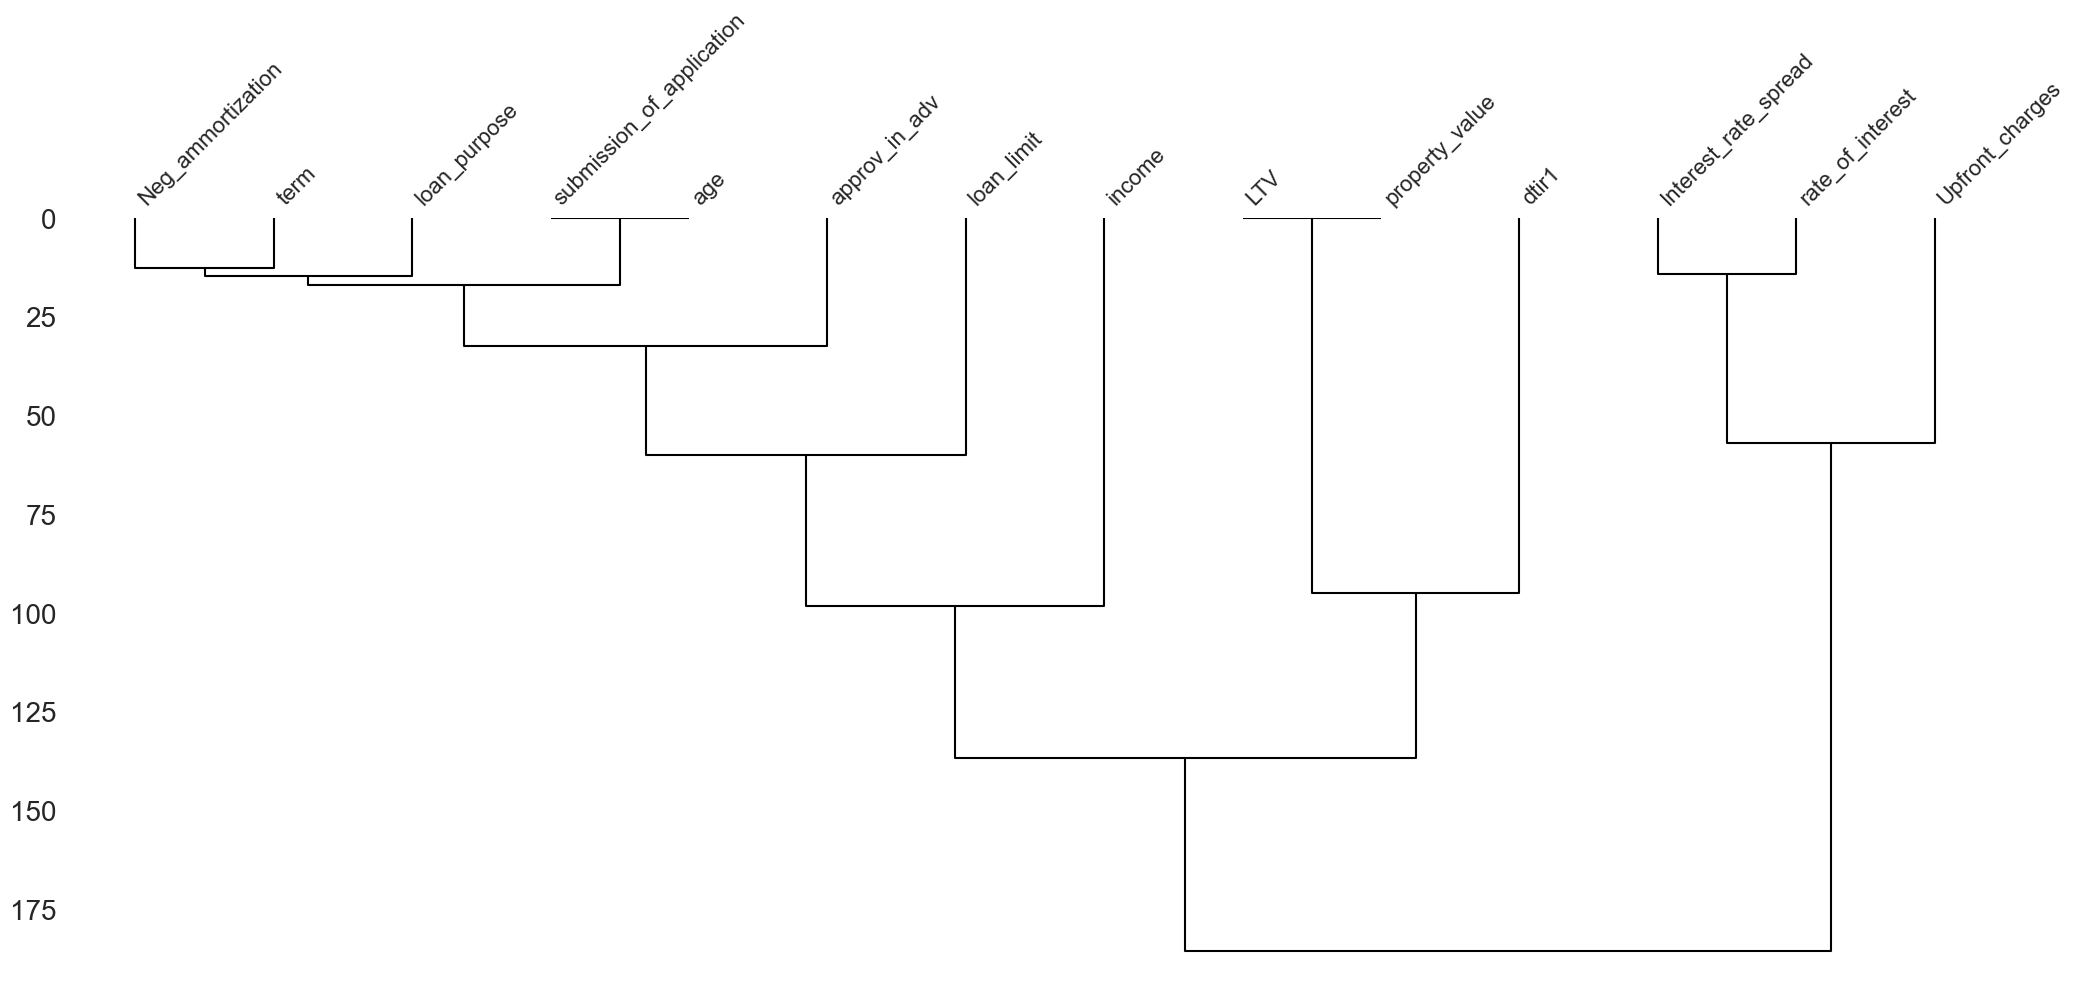

In [44]:
msno.dendrogram(df[missing_columns])

Мы интерпретируем дендрограмму на основе нисходящего подхода, т. е. обращаем внимание на высоту, на которой любые два столбца соединяются вместе с недействительными признаками. Больше будет высота, меньше будет отношение и наоборот тоже. Признаки LTV и rate_of_interest имеют максимальную высоту, что означает, что они меньше коррелируют друг с другом.

**Выводы на основе числовых статистик:**

<br>

Простые числовые статистики выгодны и эффективны при выявлении проблемных предикторов и в целом данных, когда датасет становится слишком большим для визуальной проверки. Большие датасеты долго и трудно визуализировать в виду потребляемой памяти, поэтому в кармане у нас только карта, которая позволяет использовать различные выводы на основе числовых статистик и метрик.

In [45]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [46]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


#### 3. Обработка некорректных и пропущенных значений:

Если в наших данных есть пропущенные значения, наша модель не будет обучаться, за исключением нескольких моделей.

Основные подходы к обработке неккоректных и пропущенных значений:

- Простое удаление данных (Тогда и только тогда, когда вот никак мы не можем обработать такие признаким и наблюдения)
- Кодирование неккоректных данных и пропущенных значений
- Методы заполнения по статисическим показателям (Imputing Methods)

**Удаление Данных**
----

Самый простой подход к работе с отсутствующими значениями состоит в том, чтобы полностью удалить признак(-и) и/или наблюдение(-я), которые содержат отсутствующие значения. Однако прежде чем использовать такой подход, стоит тщательно рассмотреть ряд характеристик данных. Например, отсутствующие значения можно исключить, удалив все предикторы, содержащие хотя бы одно отсутствующее значение. Точно так же отсутствующие значения можно устранить, удалив все выборки с любыми отсутствующими значениями.

<br>

**Когда трудно получить дополнительные наблюдения или когда данные содержат небольшое количество наблюдений (т. е. строк), удалять выборки из данных нежелательно.**

<br>

**Удаление признака:**

Согласно нашим числовым характеристикам, полученным выше, признак ```Upfront_charges``` обладает самой большой долей пропущенных значений - 26% Это довольно много чтобы удалить его из датасета, так поступать нежелательно, но для простоты иллюстрации принципа удаления признака посмотрим на этот метод:

In [47]:
df_temp = df.copy()

In [48]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25 #25% in this case

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)

Создав сводку по датасету df_temp, мы увидим, что теперь признак ```Upfont_chargers``` отсутствует в нашем датасете, поскольку процент отсутствующих значений превышает порог, который мы определили.

In [49]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [50]:
del df_temp

**Удаление наблюдений с некорректным признаком (строк, отдельных записей)**

Удалим те наблюдения, которые содержат пропущенные значения в 5 и более признаках:

In [51]:
df_temp = df.copy()

In [52]:
# Getting Missing count of each sample
for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()

In [53]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 148670
Samples After Removal : 132360


In [54]:
del df_temp

**Энкодинг пропущенных значений**

Когда атрибут является дискретным по своей природе, отсутствие может быть непосредственно закодировано в атрибуте, как если бы это была естественная категория.

Например, этом наборе данных атрибут ```loan_limit``` имеет 3344 отсутствующих значения, поэтому мы можем присвоить этим отсутствующим значениям какую-то новую категорию. Логически это значение может быть например - unknown, 0, no credit limit и так далее. То есть в зависимости от специфики дискретной переменной мы можем просто взять и заполнить отсутствующие значения плейсхолдером, новой категорией, которую в последующем можем спокойной использовать для целей работы.

In [55]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [56]:
df.loan_limit.value_counts()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [57]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.loan_limit.value_counts()

loan_limit
cf         135348
ncf          9978
Missing      3344
Name: count, dtype: int64

In [58]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   approv_in_adv              148670 non-null  object
 2   loan_purpose               148670 non-null  object
 3   Neg_ammortization          148670 non-null  object
 4   age                        148670 non-null  object
 5   submission_of_application  148670 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


**Методы заполнения пропущенных значений по статистическим показателям или модельным данным (Imputing, Imputing Methods)**

In [ ]:
from sklearn.impute import KNNImputer

df_temp = df.copy()

In [ ]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

In [ ]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

In [ ]:
X = knn.transform(df_temp)

In [ ]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

In [ ]:
del df_temp

### Энкодинг категориальных признаков

Категориальные признаки — это те признаки, которые содержат качественные данные. Основное внимание уделим методам, которые кодируют категориальные данные в числовые значения для того, чтобы мы могли в последующем использовать такие данные в алгоритмах машинного обучения и для целей анализа данных.

<br>

Категориальные переменные/признаки — это любой тип объекта, который можно разделить на три основных типа:
- Номинальный категориальный признак
- Порядковый категориальный признак
- Бинарный категориальный признак

<br>

Для **номинальных признаков используется** ```Label Encoding``` метод, в котором кодируется каждая категория, путем преобразования в некоторые целые значения (0, 1, 2, 3...). Этот вид кодирования может работать в случае порядковых переменных, но для кодирования категориальных признаков у него есть недостаток, заключающийся в том, что числовые значения могут быть неверно истолкованы алгоримом как имеющие некоторую иерархию/порядок в них. Эта проблема упорядочения решается в другом распространенном альтернативном подходе, который называется ```One Hot Encoding```.

<br>

```One Hot Encoding``` метод, который позволяет вам создать бинарный вектор исходного категориального признака, но в таком подходе есть свой недостаток, в случае большого количества таких переменных либо категорий вы сильно "раздуете" свое пространство признаков и столкнетесь с проблемой "Проклятия размерности".



In [59]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [60]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["gender_code"] = ord_enc.fit_transform(df[["Gender"]])
df[["gender_code", "Gender"]].head(11)

,gender_code,Gender
0,3.0,Sex Not Available
1,2.0,Male
2,2.0,Male
3,2.0,Male
4,1.0,Joint
5,1.0,Joint
6,1.0,Joint
7,0.0,Female
8,1.0,Joint
9,3.0,Sex Not Available


In [64]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["loan_type"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,type1,type2,type3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


#### [Подробнее про Кодирование категориальных переменных](https://pbpython.com/categorical-encoding.html)